# Import modules and load data

In [1]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

# load data
data = pd.read_csv('./study_202.csv')
# get data size
print(data.shape)

(1048575, 17)


# Check Basic data information (data type + statistics)

In [2]:
# get basic statistics
data.describe()

,hhid,reached_flg,num_inds,num_cookies,num_days_online,num_events,brand_sales_q5,brand_sales_q4,brand_sales_q3,brand_sales_q2,brand_sales_q1,brand_sales_post
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,5.242880e+05,1.330577e-01,1.051272e+01,3.550542e+00,1.650605e+01,1.024133e+02,8.360582e-02,8.680624e-02,9.174631e-02,9.247430e-02,9.680602e-02,1.688950e-01
std,3.026977e+05,3.396373e-01,5.563041e+00,5.002625e+00,1.294522e+01,1.595944e+02,6.179225e-01,6.120848e-01,6.001073e-01,6.222045e-01,6.056389e-01,8.529413e-01
min,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.098914e+00
25%,2.621445e+05,0.000000e+00,6.000000e+00,1.000000e+00,5.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.242880e+05,0.000000e+00,9.000000e+00,2.000000e+00,1.300000e+01,3.800000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,7.864315e+05,0.000000e+00,1.300000e+01,4.000000e+00,2.600000e+01,1.210000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.048575e+06,1.000000e+00,3.000000e+01,6.540000e+02,4.600000e+01,1.143000e+03,8.676051e+01,1.002909e+02,8.197828e+01,5.567331e+01,5.423463e+01,5.423463e+01


In [3]:
# getd data type information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 17 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   hhid              1048575 non-null  int64  
 1   reached_flg       1048575 non-null  int64  
 2   num_inds          1048575 non-null  int64  
 3   children_ind      1048575 non-null  object 
 4   hh_income_ind     1048575 non-null  object 
 5   age_ind           1048575 non-null  object 
 6   home_value_ind    1048575 non-null  object 
 7   state             1048575 non-null  object 
 8   num_cookies       1048575 non-null  int64  
 9   num_days_online   1048575 non-null  int64  
 10  num_events        1048575 non-null  int64  
 11  brand_sales_q5    1048575 non-null  float64
 12  brand_sales_q4    1048575 non-null  float64
 13  brand_sales_q3    1048575 non-null  float64
 14  brand_sales_q2    1048575 non-null  float64
 15  brand_sales_q1    1048575 non-null  float64
 16  

In [4]:
from pandas.api.types import CategoricalDtype

data['reached_flg'] = data['reached_flg'].astype('category')

children_ind_cat = CategoricalDtype(categories=['0', '1', '2+'], ordered = True)
data['children_ind'] = data['children_ind'].astype(children_ind_cat)

hh_income_ind_cat = CategoricalDtype(categories=['0 to 50', '51 to 100', '101 to 150', '151+'], ordered = True)
data['hh_income_ind'] = data['hh_income_ind'].astype(hh_income_ind_cat)

age_ind_cat = CategoricalDtype(categories=['18-19','20-29','30-39','40-49','50-59','60-64','65+'], ordered =True)
data['age_ind'] = data['age_ind'].astype(age_ind_cat)

home_value_ind_cat = CategoricalDtype(categories=['0 to 100','101 to 200','201 to 500','501+'], ordered =True)
data['home_value_ind'] = data['home_value_ind'].astype(home_value_ind_cat)

data['state'] = data['state'].astype('category')

# Check feature distribution for exploratory analysis

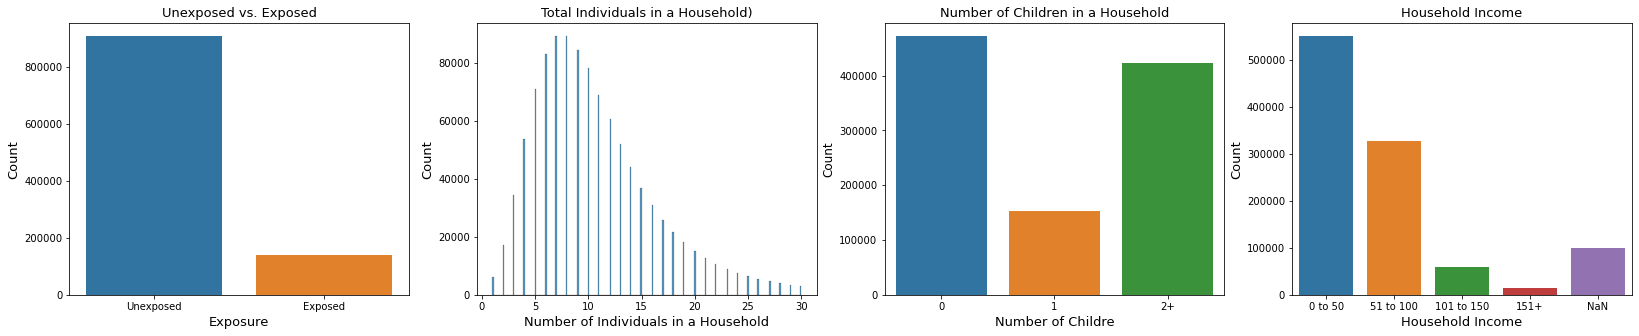

In [5]:
%matplotlib inline
plt.figure(figsize = (28, 5))
plt.subplot(1,4,1)
sns.barplot(x = ['Unexposed', 'Exposed'], y = data.reached_flg.value_counts())
plt.title('Unexposed vs. Exposed', fontsize = 13)
plt.xlabel('Exposure', fontsize = 13)
plt.ylabel('Count', fontsize = 13)
plt.subplot(1,4,2)
sns.histplot(data = data, x = 'num_inds')
plt.title('Total Individuals in a Household)', fontsize = 13)
plt.xlabel('Number of Individuals in a Household', fontsize = 13)
plt.ylabel('Count', fontsize = 13)
plt.subplot(1,4,3)
sns.barplot(x = ['0', '1', '2+'], y = data.children_ind.value_counts().sort_index())
plt.title('Number of Children in a Household', fontsize = 13)
plt.xlabel('Number of Childre',fontsize = 13)
plt.ylabel('Count', fontsize = 12)
plt.subplot(1,4,4)
sns.barplot(x = ['0 to 50', '51 to 100', '101 to 150', '151+', 'NaN'], y = data.hh_income_ind.value_counts(dropna = False).sort_index())
plt.title('Household Income', fontsize = 13)
plt.xlabel('Household Income', fontsize = 13)
plt.ylabel('Count', fontsize = 13)
plt.show()

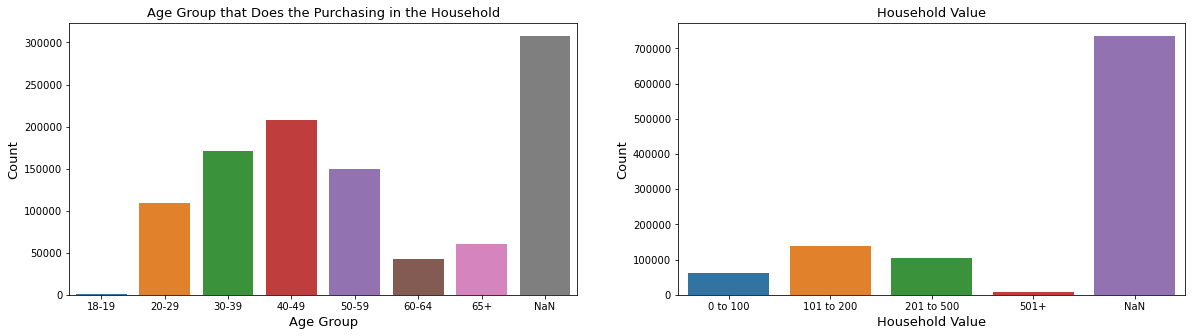

In [6]:
plt.figure(figsize = (20, 5))
plt.subplot(1,2,1)
sns.barplot(x = ['18-19','20-29','30-39','40-49','50-59','60-64','65+','NaN'], y = data.age_ind.value_counts(dropna = False).sort_index())
plt.title('Age Group that Does the Purchasing in the Household', fontsize = 13)
plt.xlabel('Age Group', fontsize = 13)
plt.ylabel('Count', fontsize = 13)
plt.subplot(1,2,2)
sns.barplot(x = ['0 to 100','101 to 200','201 to 500','501+','NaN'], y = data.home_value_ind.value_counts(dropna = False).sort_index())
plt.title('Household Value', fontsize = 13)
plt.xlabel('Household Value', fontsize = 13)
plt.ylabel('Count', fontsize = 13)
plt.show()

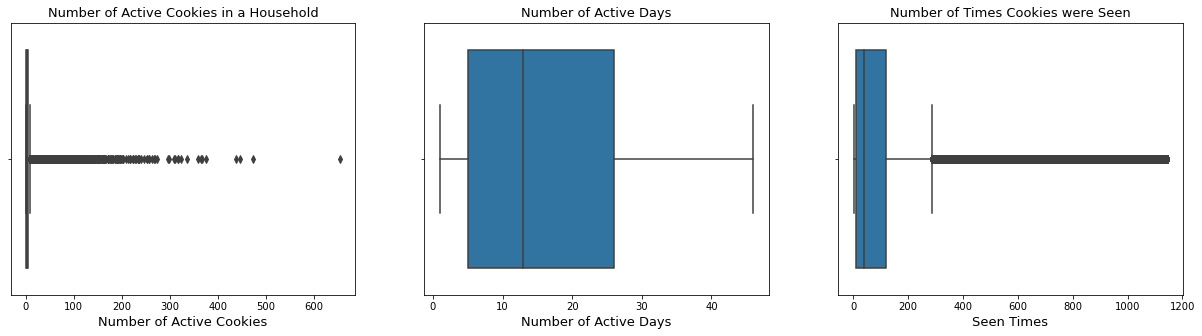

In [7]:
plt.figure(figsize = (21, 5))
plt.subplot(1,3,1)
sns.boxplot(x = data['num_cookies'])
plt.title('Number of Active Cookies in a Household', fontsize = 13)
plt.xlabel('Number of Active Cookies', fontsize = 13)
plt.subplot(1,3,2)
sns.boxplot(x = data['num_days_online'])
plt.title('Number of Active Days', fontsize = 13)
plt.xlabel('Number of Active Days', fontsize = 13)
plt.subplot(1,3,3)
sns.boxplot(x = data['num_events'])
plt.title('Number of Times Cookies were Seen', fontsize = 13)
plt.xlabel('Seen Times', fontsize = 13)
plt.show()

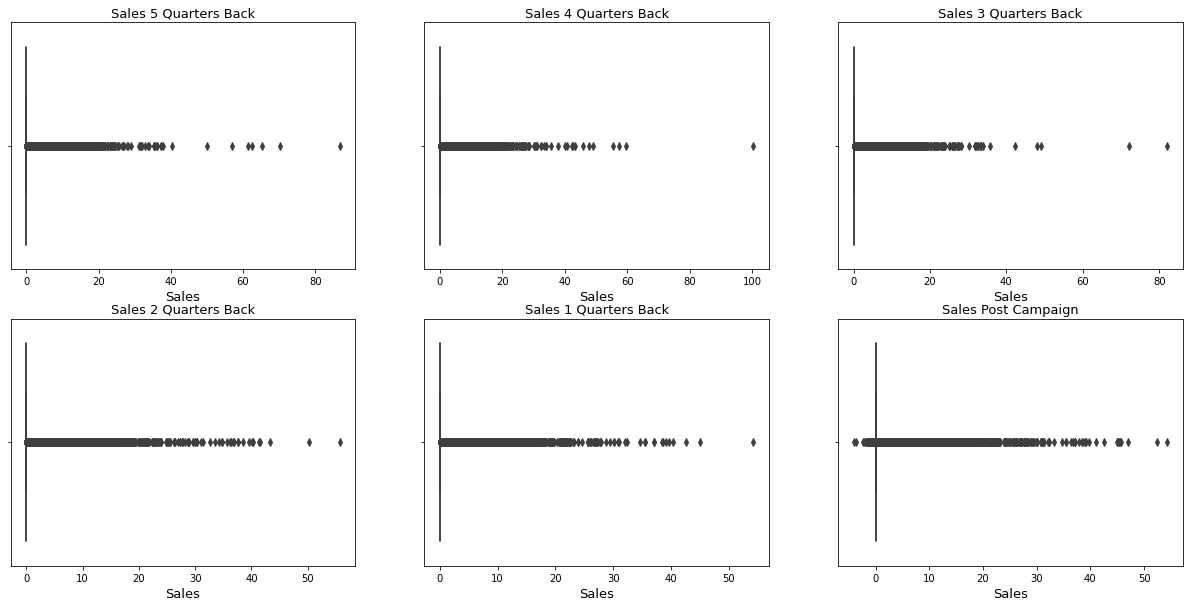

In [8]:
plt.figure(figsize = (21, 10))
plt.subplot(2,3,1)
sns.boxplot(x = data['brand_sales_q5'])
plt.title('Sales 5 Quarters Back', fontsize = 13)
plt.xlabel('Sales', fontsize = 13)
plt.subplot(2,3,2)
sns.boxplot(x = data['brand_sales_q4'])
plt.title('Sales 4 Quarters Back', fontsize = 13)
plt.xlabel('Sales', fontsize = 13)
plt.subplot(2,3,3)
sns.boxplot(x = data['brand_sales_q3'])
plt.title('Sales 3 Quarters Back', fontsize = 13)
plt.xlabel('Sales', fontsize = 13)
plt.subplot(2,3,4)
sns.boxplot(x = data['brand_sales_q2'])
plt.title('Sales 2 Quarters Back', fontsize = 13)
plt.xlabel('Sales', fontsize = 13)
plt.subplot(2,3,5)
sns.boxplot(x = data['brand_sales_q1'])
plt.title('Sales 1 Quarters Back', fontsize = 13)
plt.xlabel('Sales', fontsize = 13)
plt.subplot(2,3,6)
sns.boxplot(x = data['brand_sales_post'])
plt.title('Sales Post Campaign', fontsize = 13)
plt.xlabel('Sales', fontsize = 13)
plt.show()

## Things to notice:
#### 1. There are missing values in hh_income_ind, age_ind and home_value_ind
#### 2. num_cookies and num_events are heavily skewed to the right (potential outliers)
#### 3. all sales data are heavily skewed to the right (potential outliers)
#### 4. some post sales are negative (potentially an error?)

## To Process Missing Values
### randomly sample 10% of the data for faster processing

In [9]:
data[data.home_value_ind.isnull()].shape[0] / data.shape[0]

0.7013833059151706

#### This ratio is way too high, imputation will be very inaccurate. Therefore, home_value_ind is droppped

In [10]:
data = data.drop(['home_value_ind'], axis = 1)
data.head(3)

,hhid,reached_flg,num_inds,children_ind,hh_income_ind,age_ind,state,num_cookies,num_days_online,num_events,brand_sales_q5,brand_sales_q4,brand_sales_q3,brand_sales_q2,brand_sales_q1,brand_sales_post
0,1,0,5,2+,51 to 100,50-59,WV,6,37,247,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0,13,2+,51 to 100,50-59,MD,3,28,147,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0,17,0,51 to 100,60-64,MS,3,13,64,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
sampled_data = data.sample(frac = 0.1, random_state = 44)

### Perform Encoding and Imputation

In [12]:
data_column = data.columns

from category_encoders.ordinal import OrdinalEncoder
OE = OrdinalEncoder(handle_missing='return_nan')

encoded_data= OE.fit_transform(sampled_data)
encoded_data.head(3)

,hhid,reached_flg,num_inds,children_ind,hh_income_ind,age_ind,state,num_cookies,num_days_online,num_events,brand_sales_q5,brand_sales_q4,brand_sales_q3,brand_sales_q2,brand_sales_q1,brand_sales_post
993893,993894,1.0,4,3.0,1.0,2.0,1.0,1,2,5,0.0,0.0,0.0,0.0,0.0,0.0
925006,925007,1.0,5,3.0,1.0,3.0,2.0,1,1,8,0.0,0.0,0.0,0.0,0.0,0.0
203388,203389,1.0,9,3.0,1.0,3.0,3.0,3,21,57,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2)
imputed_data = imputer.fit_transform(encoded_data)
imputed_data = pd.DataFrame(imputed_data, columns = data_column)
imputed_data.head(3)

,hhid,reached_flg,num_inds,children_ind,hh_income_ind,age_ind,state,num_cookies,num_days_online,num_events,brand_sales_q5,brand_sales_q4,brand_sales_q3,brand_sales_q2,brand_sales_q1,brand_sales_post
0,993894.0,1.0,4.0,3.0,1.0,2.0,1.0,1.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
1,925007.0,1.0,5.0,3.0,1.0,3.0,2.0,1.0,1.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0
2,203389.0,1.0,9.0,3.0,1.0,3.0,3.0,3.0,21.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
imputed_data[['hh_income_ind', 'age_ind']] = imputed_data[['hh_income_ind', 'age_ind']].round()
imputed_data

,hhid,reached_flg,num_inds,children_ind,hh_income_ind,age_ind,state,num_cookies,num_days_online,num_events,brand_sales_q5,brand_sales_q4,brand_sales_q3,brand_sales_q2,brand_sales_q1,brand_sales_post
0,993894.0,1.0,4.0,3.0,1.0,2.0,1.0,1.0,2.0,5.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,925007.0,1.0,5.0,3.0,1.0,3.0,2.0,1.0,1.0,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,203389.0,1.0,9.0,3.0,1.0,3.0,3.0,3.0,21.0,57.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,671650.0,1.0,6.0,1.0,1.0,4.0,4.0,3.0,40.0,330.0,0.000000,1.283447,0.128345,1.254594,0.188189,0.093950
4,374729.0,1.0,15.0,3.0,2.0,4.0,5.0,5.0,29.0,81.0,0.224781,0.011239,0.001124,0.513703,0.077055,0.041040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104853,1024573.0,1.0,11.0,2.0,1.0,4.0,26.0,10.0,38.0,231.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
104854,288566.0,2.0,15.0,1.0,1.0,3.0,18.0,1.0,8.0,69.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
104855,10555.0,1.0,11.0,1.0,1.0,6.0,25.0,10.0,42.0,341.0,5.353515,0.718411,0.071841,0.535352,0.080303,0.039236
104856,244070.0,1.0,13.0,1.0,1.0,5.0,6.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [15]:
inputed_data = OE.inverse_transform(imputed_data)
inputed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104858 entries, 0 to 104857
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   hhid              104858 non-null  float64 
 1   reached_flg       104858 non-null  category
 2   num_inds          104858 non-null  float64 
 3   children_ind      104858 non-null  category
 4   hh_income_ind     104858 non-null  category
 5   age_ind           104858 non-null  category
 6   state             104858 non-null  category
 7   num_cookies       104858 non-null  float64 
 8   num_days_online   104858 non-null  float64 
 9   num_events        104858 non-null  float64 
 10  brand_sales_q5    104858 non-null  float64 
 11  brand_sales_q4    104858 non-null  float64 
 12  brand_sales_q3    104858 non-null  float64 
 13  brand_sales_q2    104858 non-null  float64 
 14  brand_sales_q1    104858 non-null  float64 
 15  brand_sales_post  104858 non-null  float64 
dtypes:

## Explore Extreme Values

#### Want to know if these outliers or extreme values correspond to the same group of households (It makes sense for a big buyer to stay as a big buyer). So I start from Q5 data and look for households that spent more than 40 in Q5.

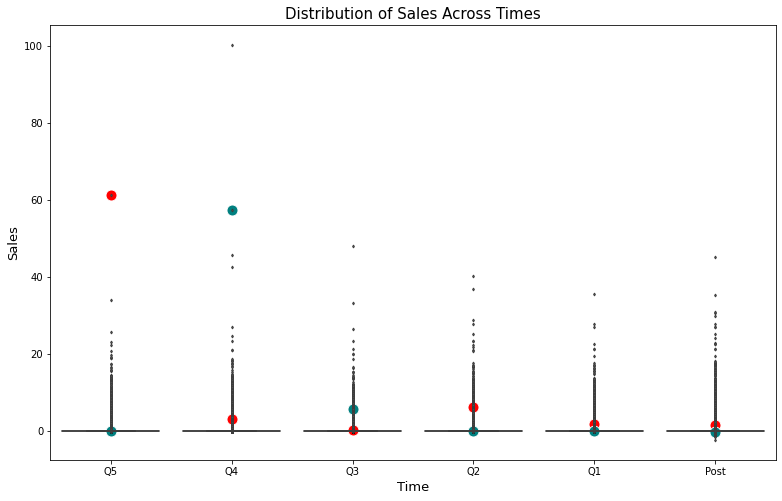

In [16]:
# inputed_data[(inputed_data.brand_sales_q4 > 40)]

all_sales_data = inputed_data[['hhid','brand_sales_q5','brand_sales_q4','brand_sales_q3','brand_sales_q2','brand_sales_q1','brand_sales_post']].melt(id_vars = 'hhid')
one_point = inputed_data[inputed_data['hhid'] == 391510][['hhid','brand_sales_q5','brand_sales_q4','brand_sales_q3','brand_sales_q2','brand_sales_q1','brand_sales_post']].melt(id_vars = 'hhid')
two_point = inputed_data[inputed_data['hhid'] == 240183][['hhid','brand_sales_q5','brand_sales_q4','brand_sales_q3','brand_sales_q2','brand_sales_q1','brand_sales_post']].melt(id_vars = 'hhid')

plt.figure(figsize = (13, 8))
sns.boxplot(x = 'variable', y = 'value', data = all_sales_data, flierprops = dict(markerfacecolor = '0.50', markersize = 2))
sns.scatterplot(x = 'variable', y = 'value', data = one_point, color = 'red', s= 120)
sns.scatterplot(x = 'variable', y = 'value', data = two_point, color = 'teal', s= 120)
plt.xlabel('Time', fontsize = 13)
plt.ylabel('Sales', fontsize = 13)
plt.title('Distribution of Sales Across Times', fontsize= 15)
plt.xticks(ticks = [0, 1, 2, 3, 4, 5], labels = ['Q5', 'Q4', 'Q3', 'Q2', 'Q1', 'Post'])
plt.show()

#### It looks like that the poeple households who spent a ton in Q5 did not speed as much in the remaining time (Q4 - Q2). Therefore, this negates the hypotesis that the outliers are the same groups of households.

#### However, it does make sense for households to express same purchasing behavior right before and after the campaign started (Q1 and post). Therefore, let's look at the extreme datapoints in Q1 (> 10).

In [17]:
inputed_data[inputed_data.brand_sales_q1 > 20]

,hhid,reached_flg,num_inds,children_ind,hh_income_ind,age_ind,state,num_cookies,num_days_online,num_events,brand_sales_q5,brand_sales_q4,brand_sales_q3,brand_sales_q2,brand_sales_q1,brand_sales_post
6655,209372.0,0,12.0,0,0 to 50,65+,SC,3.0,15.0,46.0,0.000000,0.000000,0.000000,0.000000,27.651636,27.651636
10136,666582.0,0,7.0,2+,51 to 100,40-49,FL,3.0,6.0,22.0,0.989460,0.049473,0.004947,0.098946,21.365297,21.358124
57826,940116.0,0,15.0,2+,0 to 50,65+,GA,4.0,16.0,30.0,0.000000,0.000000,1.479167,0.000000,35.472736,35.398778
78306,512776.0,0,14.0,0,51 to 100,50-59,CA,1.0,2.0,3.0,0.000000,0.000000,0.000000,0.000000,26.872033,26.872033
85152,157931.0,0,18.0,0,0 to 50,30-39,FL,1.0,2.0,3.0,0.360747,0.018037,0.001804,0.036075,21.186062,21.183447
87472,425902.0,0,9.0,1,51 to 100,50-59,CA,5.0,38.0,322.0,0.000000,0.000000,0.000000,0.000000,22.493767,22.493767


#### In this case, the pre and post campaign look similar in sales amount even for the extreme values. This also means that for the difference in difference model, I will only use Q1 data as the pre campaign data. This makes intuitive sense as well, because the post campaign sales only contain 4 weeks of data after campaign concludes. 5 quarters back in time is too long ago, the data might not be suitable for analyzing the effect of this campaign because we have no clue on what happened 1 year back that could have influenced the sales.

#### check cookies related data, maybe the extreme values correspond to the same group of households 

In [18]:
inputed_data[['num_cookies', 'num_events']].corr()

,num_cookies,num_events
num_cookies,1.000000,0.391135
num_events,0.391135,1.000000


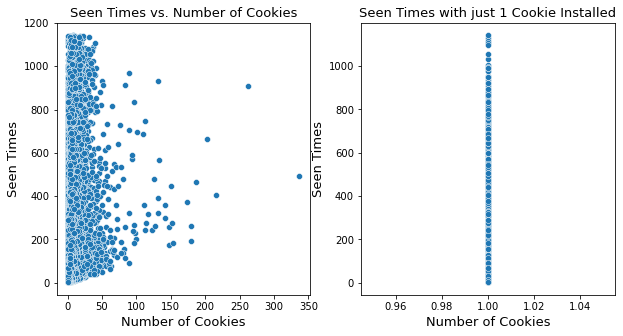

In [19]:
plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'num_cookies', y = 'num_events', data = inputed_data)
plt.xlabel('Number of Cookies', fontsize = 13)
plt.ylabel('Seen Times', fontsize = 13)
plt.title('Seen Times vs. Number of Cookies', fontsize = 13)
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'num_cookies', y = 'num_events', data = inputed_data[inputed_data['num_cookies']==1])
plt.xlabel('Number of Cookies', fontsize = 13)
plt.ylabel('Seen Times', fontsize = 13)
plt.title('Seen Times with just 1 Cookie Installed', fontsize = 13)
plt.show()

#### This doesn't make much sense, how can 1 active cookie be seen over 1100 times over the entire time spam (maybe the household is spamming the candy bar website), let's explore the data where there is only 1 active cookie, and the number of active days are < 10 and have been seen 500 times (~70 weeks * 7 days/week)

In [20]:
inputed_data[['num_cookies','num_events','num_days_online']].mean()

num_cookies          3.537308
num_events         102.224084
num_days_online     16.483263
dtype: float64

In [21]:
inputed_data[(inputed_data['num_cookies']==1) & (inputed_data['num_events'] > 500) & (inputed_data['num_days_online'] < 10)]

,hhid,reached_flg,num_inds,children_ind,hh_income_ind,age_ind,state,num_cookies,num_days_online,num_events,brand_sales_q5,brand_sales_q4,brand_sales_q3,brand_sales_q2,brand_sales_q1,brand_sales_post
29608,666133.0,0,4.0,2+,0 to 50,40-49,PA,1.0,6.0,681.0,0.0,0.0,0.0,0.0,0.0,0.0


#### it looks like the sales are pretty much all 0s for these data. Because we have no extra information on these obervation, I can't assume these are anomalous points. Therefore, I won't drop them, but further investigation should be made if time and budget allow

## Let's check the data for which the post sales are negative

In [22]:
print('original size: ', inputed_data.shape)
print('negative data size: ', inputed_data[inputed_data.brand_sales_post < 0].shape)
print("ratio of negative sales: ", 9373/inputed_data.shape[0])

original size:  (104858, 16)
negative data size:  (9373, 16)
ratio of negative sales:  0.08938755269030499


#### Assume the negative points are invalid data, since the there is enough data, I will drop these obversations

In [23]:
inputed_data = inputed_data[inputed_data.brand_sales_post >= 0]
inputed_data

,hhid,reached_flg,num_inds,children_ind,hh_income_ind,age_ind,state,num_cookies,num_days_online,num_events,brand_sales_q5,brand_sales_q4,brand_sales_q3,brand_sales_q2,brand_sales_q1,brand_sales_post
0,993894.0,0,4.0,2+,0 to 50,20-29,IN,1.0,2.0,5.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,925007.0,0,5.0,2+,0 to 50,30-39,WA,1.0,1.0,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,203389.0,0,9.0,2+,0 to 50,30-39,WV,3.0,21.0,57.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,671650.0,0,6.0,0,0 to 50,40-49,TX,3.0,40.0,330.0,0.000000,1.283447,0.128345,1.254594,0.188189,0.093950
4,374729.0,0,15.0,2+,51 to 100,40-49,NY,5.0,29.0,81.0,0.224781,0.011239,0.001124,0.513703,0.077055,0.041040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104853,1024573.0,0,11.0,1,0 to 50,40-49,IL,10.0,38.0,231.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
104854,288566.0,1,15.0,0,0 to 50,30-39,VA,1.0,8.0,69.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
104855,10555.0,0,11.0,0,0 to 50,60-64,AL,10.0,42.0,341.0,5.353515,0.718411,0.071841,0.535352,0.080303,0.039236
104856,244070.0,0,13.0,0,0 to 50,50-59,OH,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [24]:
inputed_data['hhid'] = inputed_data['hhid'].astype('int64')
inputed_data['num_inds'] = inputed_data['num_inds'].astype('int64')
inputed_data['num_cookies'] = inputed_data['num_cookies'].astype('int64')
inputed_data['num_days_online'] = inputed_data['num_days_online'].astype('int64')
inputed_data['num_events'] = inputed_data['num_events'].astype('int64')

inputed_data['reached_flg'] = inputed_data['reached_flg'].astype('category')

inputed_data.head()

,hhid,reached_flg,num_inds,children_ind,hh_income_ind,age_ind,state,num_cookies,num_days_online,num_events,brand_sales_q5,brand_sales_q4,brand_sales_q3,brand_sales_q2,brand_sales_q1,brand_sales_post
0,993894,0,4,2+,0 to 50,20-29,IN,1,2,5,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
1,925007,0,5,2+,0 to 50,30-39,WA,1,1,8,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
2,203389,0,9,2+,0 to 50,30-39,WV,3,21,57,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
3,671650,0,6,0,0 to 50,40-49,TX,3,40,330,0.000000,1.283447,0.128345,1.254594,0.188189,0.09395
4,374729,0,15,2+,51 to 100,40-49,NY,5,29,81,0.224781,0.011239,0.001124,0.513703,0.077055,0.04104


In [25]:
clean_data = inputed_data.copy()
clean_data.to_csv('./clean_data.csv')

## Analyze Campaign Performance (sales)

### Check if features (Number of Inidividuals, Cookies-related) are balanced between Control and Treatment groups

In [26]:
from scipy import stats
# t-test post
print('p-value for Number of Individuals: ', end = '')
print(stats.ttest_ind(clean_data['num_inds'][clean_data['reached_flg'] == 1],
                      clean_data['num_inds'][clean_data['reached_flg'] == 0])[1])
print('p-value for Number of Cookies: ', end = '')
print(stats.ttest_ind(clean_data['num_cookies'][clean_data['reached_flg'] == 1],
                      clean_data['num_cookies'][clean_data['reached_flg'] == 0])[1])
print('p-value for Number of Days Online: ', end = '')
print(stats.ttest_ind(clean_data['num_days_online'][clean_data['reached_flg'] == 1],
                      clean_data['num_days_online'][clean_data['reached_flg'] == 0])[1])
print('p-value for Number of Events: ', end = '')
print(stats.ttest_ind(clean_data['num_events'][clean_data['reached_flg'] == 1],
                      clean_data['num_events'][clean_data['reached_flg'] == 0])[1])

p-value for Number of Individuals: 0.22819952818704922
p-value for Number of Cookies: 1.419035177572668e-28
p-value for Number of Days Online: 9.081800856184542e-214
p-value for Number of Events: 1.4695884065895364e-195


In [27]:
print('Number of Individuals mean comparison: ')
print(clean_data.groupby('reached_flg')[['num_inds']].mean().reset_index())
print('Number of Cookies mean comparison: ')
print(clean_data.groupby('reached_flg')[['num_cookies']].mean().reset_index())
print('Number of Days Online mean comparison: ')
print(clean_data.groupby('reached_flg')[['num_days_online']].mean().reset_index())
print('Number of Events mean comparison: ')
print(clean_data.groupby('reached_flg')[['num_events']].mean().reset_index())

Number of Individuals mean comparison: 
  reached_flg   num_inds
0           0  10.519007
1           1  10.453288
Number of Cookies mean comparison: 
  reached_flg  num_cookies
0           0     3.604520
1           1     3.072007
Number of Days Online mean comparison: 
  reached_flg  num_days_online
0           0        16.982912
1           1        13.029764
Number of Events mean comparison: 
  reached_flg  num_events
0           0  108.166601
1           1   61.493170


In [28]:
pre_data = clean_data.iloc[:, :-1]
pre_data['post_flg'] = 0
pre_data.rename({'brand_sales_q1':'sales'}, axis = 1, inplace = True)

post_data = pd.merge(clean_data.iloc[:, :-2], clean_data[['hhid', 'brand_sales_post']], on = 'hhid')
post_data['post_flg'] = 1
post_data.rename({'brand_sales_post':'sales'}, axis = 1, inplace = True)

In [29]:
combined_data = pd.concat([pre_data, post_data])
combined_data = combined_data.drop(['hhid'], axis = 1)
combined_data['post_flg'] = combined_data['post_flg'].astype('category')
combined_data['reached_flg'] = combined_data['reached_flg'].astype('category')
combined_data

,reached_flg,num_inds,children_ind,hh_income_ind,age_ind,state,num_cookies,num_days_online,num_events,brand_sales_q5,brand_sales_q4,brand_sales_q3,brand_sales_q2,sales,post_flg
0,0,4,2+,0 to 50,20-29,IN,1,2,5,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,0,5,2+,0 to 50,30-39,WA,1,1,8,0.000000,0.000000,0.000000,0.000000,0.000000,0
2,0,9,2+,0 to 50,30-39,WV,3,21,57,0.000000,0.000000,0.000000,0.000000,0.000000,0
3,0,6,0,0 to 50,40-49,TX,3,40,330,0.000000,1.283447,0.128345,1.254594,0.188189,0
4,0,15,2+,51 to 100,40-49,NY,5,29,81,0.224781,0.011239,0.001124,0.513703,0.077055,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95480,0,11,1,0 to 50,40-49,IL,10,38,231,0.000000,0.000000,0.000000,0.000000,0.000000,1
95481,1,15,0,0 to 50,30-39,VA,1,8,69,0.000000,0.000000,0.000000,0.000000,0.000000,1
95482,0,11,0,0 to 50,60-64,AL,10,42,341,5.353515,0.718411,0.071841,0.535352,0.039236,1
95483,0,13,0,0 to 50,50-59,OH,1,1,1,0.000000,0.000000,0.000000,0.000000,0.000000,1


#### Output combined data as a csv file, so it can be processed in R to perform propensity score matching

In [30]:
combined_data.to_csv('./combined_data.csv')

#### Get the matched output from R, process data formatting and check matching result

In [31]:
matched_data = pd.read_csv('matched_data.csv', index_col=0)
matched_data = matched_data.drop(['treated', 'distance', 'weights', 'subclass'], axis = 1)

matched_data['reached_flg'] = matched_data['reached_flg'].astype('category')
matched_data['children_ind'] = matched_data['children_ind'].astype(children_ind_cat)
matched_data['hh_income_ind'] = matched_data['hh_income_ind'].astype(hh_income_ind_cat)
matched_data['age_ind'] = matched_data['age_ind'].astype(age_ind_cat)
matched_data['state'] = matched_data['state'].astype('category')

#### perform t-test to check if there is a significant difference between treatment and control group

In [32]:
print('p-value for Number of Individuals: ', end = '')
print(stats.ttest_ind(matched_data['num_inds'][matched_data['reached_flg'] == 1],
                      matched_data['num_inds'][matched_data['reached_flg'] == 0])[1])
print('p-value for Number of Cookies: ', end = '')
print(stats.ttest_ind(matched_data['num_cookies'][matched_data['reached_flg'] == 1],
                      matched_data['num_cookies'][matched_data['reached_flg'] == 0])[1])
print('p-value for Number of Days Online: ', end = '')
print(stats.ttest_ind(matched_data['num_days_online'][matched_data['reached_flg'] == 1],
                      matched_data['num_days_online'][matched_data['reached_flg'] == 0])[1])
print('p-value for Number of Events: ', end = '')
print(stats.ttest_ind(matched_data['num_events'][matched_data['reached_flg'] == 1],
                      matched_data['num_events'][matched_data['reached_flg'] == 0])[1])

p-value for Number of Individuals: 0.0008403699860322232
p-value for Number of Cookies: 0.049174473355120256
p-value for Number of Days Online: 2.0935930461381483e-51
p-value for Number of Events: 2.573698756546069e-70


#### It looks like the p-value for number of cookies is the only one that's above 0.05 (accepts null hypothesis - treatment and control are the same). However, even though the remaining p-values are still way below 0.05. They are much greater than the values before propensity score matching score was done. To confirm, let's compare the mean values between the 2 groups.

In [33]:
print('Number of Individuals mean comparison: ')
print(matched_data.groupby('reached_flg')[['num_inds']].mean().reset_index())
print('Number of Cookies mean comparison: ')
print(matched_data.groupby('reached_flg')[['num_cookies']].mean().reset_index())
print('Number of Days Online mean comparison: ')
print(matched_data.groupby('reached_flg')[['num_days_online']].mean().reset_index())
print('Number of Events mean comparison: ')
print(matched_data.groupby('reached_flg')[['num_events']].mean().reset_index())

Number of Individuals mean comparison: 
  reached_flg   num_inds
0           0  10.285835
1           1  10.453288
Number of Cookies mean comparison: 
  reached_flg  num_cookies
0           0     2.982968
1           1     3.072007
Number of Days Online mean comparison: 
  reached_flg  num_days_online
0           0        11.843929
1           1        13.029764
Number of Events mean comparison: 
  reached_flg  num_events
0           0   46.205565
1           1   61.493170


#### It can be seen that the means are much closer between treatmetn and control groups. Even though the difference in mean is still quite noticeable, I will assume that control and treatment groups are reasonably balanced in their covariates. I will now proceed to deal with other issues noticed during EDA.

#### first perform t-test on the **post campaign sales** data to see if there is a significant difference between treatment and control group

In [44]:
matched_data[matched_data['post_flg'] == 1].groupby('reached_flg')['sales'].mean()

reached_flg
0    0.188275
1    0.205390
Name: sales, dtype: float64

In [48]:
# t-test post
post_treat = matched_data['sales'][(matched_data['reached_flg'] == 1) & (matched_data['post_flg'] == 1)]
post_control = matched_data['sales'][(matched_data['reached_flg'] == 0) & (matched_data['post_flg'] == 1)]
stats.ttest_ind(post_treat, post_control)

Ttest_indResult(statistic=1.4603918797645032, pvalue=0.1441957122608956)

### the results are statisically insignificant at 0.1

### Now we can look at the different between treatment and control in Q1

In [45]:
matched_data[matched_data['post_flg'] == 0].groupby('reached_flg')['sales'].mean()

reached_flg
0    0.106485
1    0.102717
Name: sales, dtype: float64

In [35]:
from scipy import stats
# t-test post
stats.ttest_ind(matched_data['sales'][(matched_data['reached_flg'] == 1) & (matched_data['post_flg'] == 0)],
                      matched_data['sales'][(matched_data['reached_flg'] == 0) & (matched_data['post_flg'] == 0)])

Ttest_indResult(statistic=-0.5090791013248895, pvalue=0.6107014931894178)

### The results are statistically insignificant, suggesting that there is no difference between the sales

### Now we can look at the different between pre and post campaign sales and check if it is significant

In [36]:
# t-test post
stats.ttest_ind(matched_data['sales'][matched_data['post_flg'] == 0],
                      matched_data['sales'][matched_data['post_flg'] == 1])

Ttest_indResult(statistic=-13.339641684923741, pvalue=1.6106449749738549e-40)

#### The result is definitely significant, suggesting there is definitely a difference (perhaps an increase in sales after campaign)

In [37]:
print(stats.ttest_ind(matched_data['brand_sales_q5'][matched_data['reached_flg'] == 1],
                      matched_data['brand_sales_q5'][matched_data['reached_flg'] == 0]))
print(stats.ttest_ind(matched_data['brand_sales_q4'][matched_data['reached_flg'] == 1],
                      matched_data['brand_sales_q4'][matched_data['reached_flg'] == 0]))
print(stats.ttest_ind(matched_data['brand_sales_q3'][matched_data['reached_flg'] == 1],
                      matched_data['brand_sales_q3'][matched_data['reached_flg'] == 0]))
print(stats.ttest_ind(matched_data['brand_sales_q2'][matched_data['reached_flg'] == 1],
                      matched_data['brand_sales_q2'][matched_data['reached_flg'] == 0]))

Ttest_indResult(statistic=0.08212633271527164, pvalue=0.934546599860938)
Ttest_indResult(statistic=-2.2054558838619793, pvalue=0.02742689826469985)
Ttest_indResult(statistic=-1.5098608612551205, pvalue=0.13108559167585662)
Ttest_indResult(statistic=2.2599844940824276, pvalue=0.023826728135802614)


#### Let's look at some distribution first between Treatment and Control, to make sure that they are even

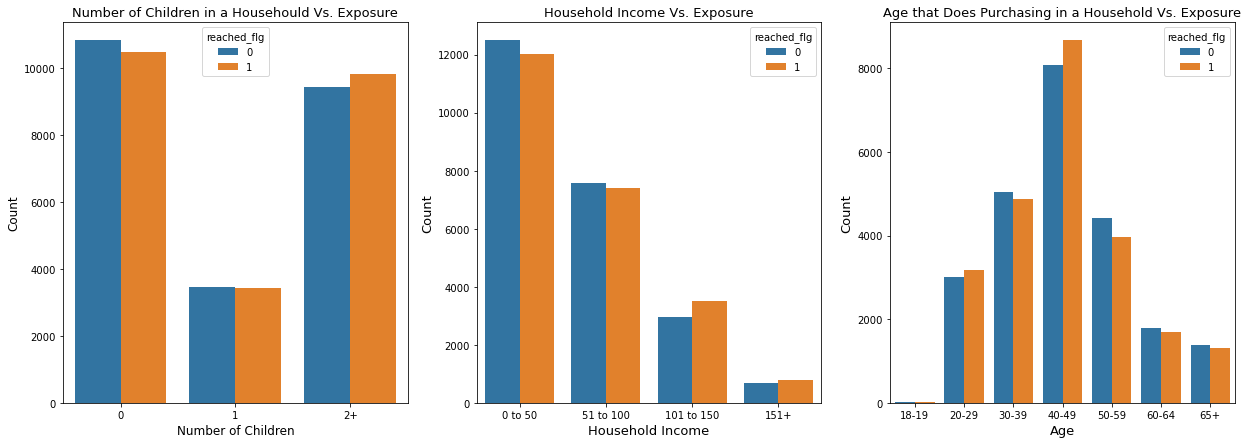

In [38]:
children_ind_reached = matched_data.groupby('reached_flg')['children_ind'].value_counts().reset_index().rename({'level_1':'Number of Children'}, axis = 1).sort_values('Number of Children')
hh_income_ind_reached = matched_data.groupby('reached_flg')['hh_income_ind'].value_counts().reset_index().rename({'level_1':'Income'}, axis = 1).sort_values('Income')
age_ind_reached = matched_data.groupby('reached_flg')['age_ind'].value_counts().reset_index().rename({'level_1':'Age'}, axis = 1).sort_values('Age')

plt.figure(figsize = (21, 7))
plt.subplot(1, 3, 1)
sns.barplot(x = 'Number of Children', y = 'children_ind', hue = 'reached_flg', data = children_ind_reached)
plt.xlabel('Number of Children', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.title('Number of Children in a Househould Vs. Exposure', fontsize = 13)
plt.subplot(1, 3, 2)
sns.barplot(x = 'Income', y = 'hh_income_ind', hue = 'reached_flg', data = hh_income_ind_reached)
plt.xlabel('Household Income', fontsize = 13)
plt.ylabel('Count', fontsize = 13)
plt.title('Household Income Vs. Exposure', fontsize = 13)
plt.subplot(1, 3, 3)
sns.barplot(x = 'Age', y = 'age_ind', hue = 'reached_flg', data = age_ind_reached)
plt.xlabel('Age', fontsize = 13)
plt.ylabel('Count', fontsize = 13)
plt.title('Age that Does Purchasing in a Household Vs. Exposure', fontsize = 13)
plt.show()

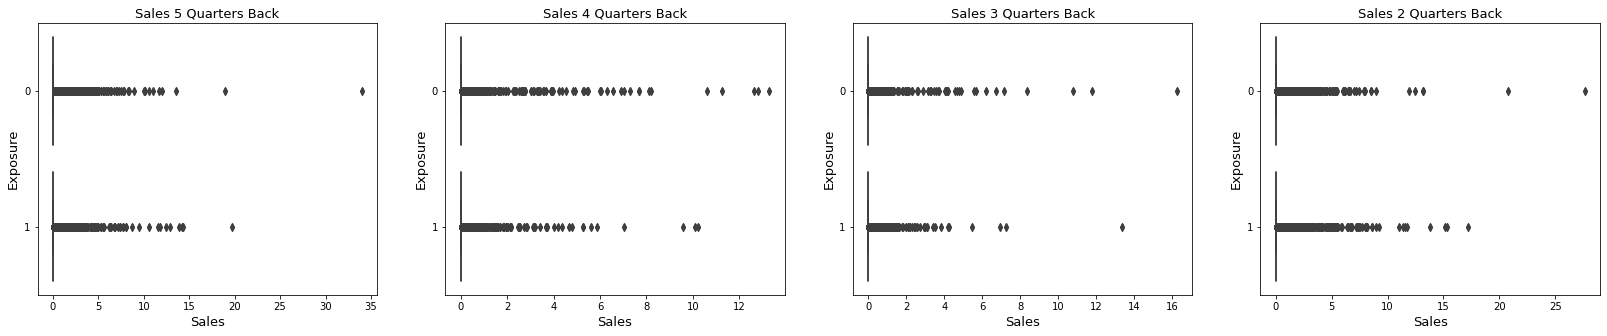

In [39]:
plt.figure(figsize = (28, 5))
plt.subplot(1,4,1)
sns.boxplot(x ='brand_sales_q5', y = 'reached_flg', data = matched_data)
plt.title('Sales 5 Quarters Back', fontsize = 13)
plt.xlabel('Sales', fontsize = 13)
plt.ylabel('Exposure', fontsize = 13)
plt.subplot(1,4,2)
sns.boxplot(x = 'brand_sales_q4', y = 'reached_flg', data = matched_data)
plt.title('Sales 4 Quarters Back', fontsize = 13)
plt.xlabel('Sales', fontsize = 13)
plt.ylabel('Exposure', fontsize = 13)
plt.subplot(1,4,3)
sns.boxplot(x = 'brand_sales_q3', y = 'reached_flg', data = matched_data)
plt.title('Sales 3 Quarters Back', fontsize = 13)
plt.xlabel('Sales', fontsize = 13)
plt.ylabel('Exposure', fontsize = 13)
plt.subplot(1,4,4)
sns.boxplot(x = 'brand_sales_q2', y = 'reached_flg', data = matched_data)
plt.title('Sales 2 Quarters Back', fontsize = 13)
plt.xlabel('Sales', fontsize = 13)
plt.ylabel('Exposure', fontsize = 13)
plt.show()

In [50]:
matched_data['post_flg'] = matched_data['post_flg'].astype('category')
matched_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47440 entries, 7 to 190970
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   reached_flg      47440 non-null  category
 1   num_inds         47440 non-null  int64   
 2   children_ind     47440 non-null  category
 3   hh_income_ind    47440 non-null  category
 4   age_ind          47440 non-null  category
 5   state            47440 non-null  category
 6   num_cookies      47440 non-null  int64   
 7   num_days_online  47440 non-null  int64   
 8   num_events       47440 non-null  int64   
 9   brand_sales_q5   47440 non-null  float64 
 10  brand_sales_q4   47440 non-null  float64 
 11  brand_sales_q3   47440 non-null  float64 
 12  brand_sales_q2   47440 non-null  float64 
 13  sales            47440 non-null  float64 
 14  post_flg         47440 non-null  category
dtypes: category(6), float64(5), int64(4)
memory usage: 4.9 MB


### Perform difference in difference, using only Q1 data and post sales data

In [51]:
import statsmodels.formula.api as smf

results = smf.ols('sales ~ num_inds + children_ind + hh_income_ind + age_ind + state + \
                   num_cookies + num_days_online + num_events + \
                   brand_sales_q5 + brand_sales_q4 + brand_sales_q3 + brand_sales_q2 + \
                   reached_flg * post_flg', data = matched_data).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     14.49
Date:                Sun, 19 Dec 2021   Prob (F-statistic):          1.11e-167
Time:                        21:42:19   Log-Likelihood:                -53448.
No. Observations:               47440   AIC:                         1.070e+05
Df Residuals:                   47368   BIC:                         1.077e+05
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [41]:
time_data = data.groupby('reached_flg')[['brand_sales_q5', 'brand_sales_q4', 'brand_sales_q3', 'brand_sales_q2', 'brand_sales_q1', 'brand_sales_post']].mean()
time_data = time_data.reset_index()

time_map = {'brand_sales_q5': 1,
            'brand_sales_q4': 2,
            'brand_sales_q3': 3,
            'brand_sales_q2': 4,
            'brand_sales_q1': 5,
            'brand_sales_post': 6}

time_data = time_data.rename(time_map, axis = 1)
time_data = time_data.melt(id_vars = 'reached_flg')

rev_time_map = {1: 'Q5',
                2: 'Q4',
                3: 'Q3',
                4: 'Q2',
                5: 'Q1',
                6: 'Post'}
time_data['variable'] = time_data['variable'].replace(rev_time_map)
time_data = time_data.rename({'variable':'Time',
                              'value': 'Average Sales'}, axis = 1)
# time_data['Time'] = time_data['Time'].astype('int64')
time_data

,reached_flg,Time,Average Sales
0,0,Q5,0.082877
1,1,Q5,0.088354
2,0,Q4,0.086612
3,1,Q4,0.088072
4,0,Q3,0.091208
5,1,Q3,0.095255
6,0,Q2,0.091935
7,1,Q2,0.095985
8,0,Q1,0.096715
9,1,Q1,0.097402


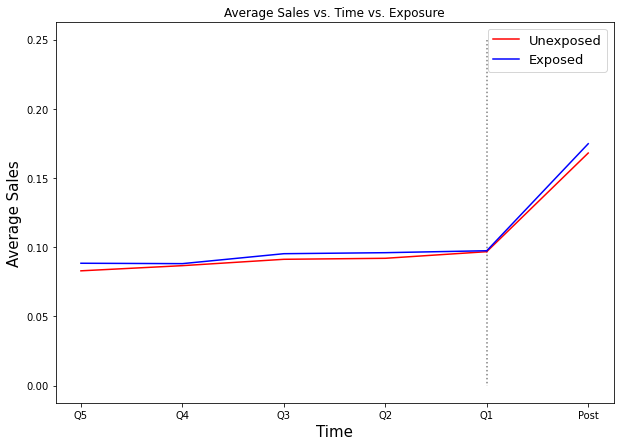

In [42]:
plt.figure(figsize = (10, 7))
sns.lineplot(x = 'Time', y = 'Average Sales', data = time_data[time_data['reached_flg'] == 0].iloc[:-1, :], color = 'red', label = 'Unexposed')
sns.lineplot(x = 'Time', y = 'Average Sales', data = time_data[time_data['reached_flg'] == 0].iloc[-2:, :], color = 'red')
sns.lineplot(x = 'Time', y = 'Average Sales', data = time_data[time_data['reached_flg'] == 1].iloc[:-1, :], color = 'blue', label = 'Exposed')
sns.lineplot(x = 'Time', y = 'Average Sales', data = time_data[time_data['reached_flg'] == 1].iloc[-2:, :], color = 'blue')
plt.vlines(x = 4, ymin=0.25, ymax = 0, linestyles='dotted', color = 'grey')
plt.xlabel('Time', fontsize = 15)
plt.ylabel('Average Sales', fontsize = 15)
plt.title('Average Sales vs. Time vs. Exposure')
plt.legend(fontsize = 13)
plt.show()